In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive

drive.mount('/content/drive')

PROJECT_PATH = "/content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01"
RAW_PATH = f"{PROJECT_PATH}/data/processed/IT24102748_dimensionality_reduction(3rd).csv"

# Load dataset
df = pd.read_csv(RAW_PATH)
print("Dataset loaded:", df.shape)
df.head()

Mounted at /content/drive
Dataset loaded: (1025, 13)


,cholesterol,max_heart_rate,thalassemia,chest_pain_type,st_depression,num_major_vessels,exercise_angina,resting_bp,age,st_slope,sex,resting_ecg,heart_disease
0,-0.659332,0.821321,1.089852,-0.915755,-0.060888,1.209221,-0.712287,-0.377636,-0.268437,0.995433,0.661504,0.891255,0
1,-0.833861,0.255968,1.089852,-0.915755,1.727137,-0.731971,1.403928,0.479107,-0.158157,-2.243675,0.661504,-1.004049,0
2,-1.396233,-1.048692,1.089852,-0.915755,1.301417,-0.731971,1.403928,0.764688,1.716595,-2.243675,0.661504,0.891255,0
3,-0.833861,0.516900,1.089852,-0.915755,-0.912329,0.238625,-0.712287,0.936037,0.724079,0.995433,0.661504,0.891255,0
4,0.930822,-1.874977,-0.522122,-0.915755,0.705408,2.179817,-0.712287,0.364875,0.834359,-0.624121,-1.511706,0.891255,0


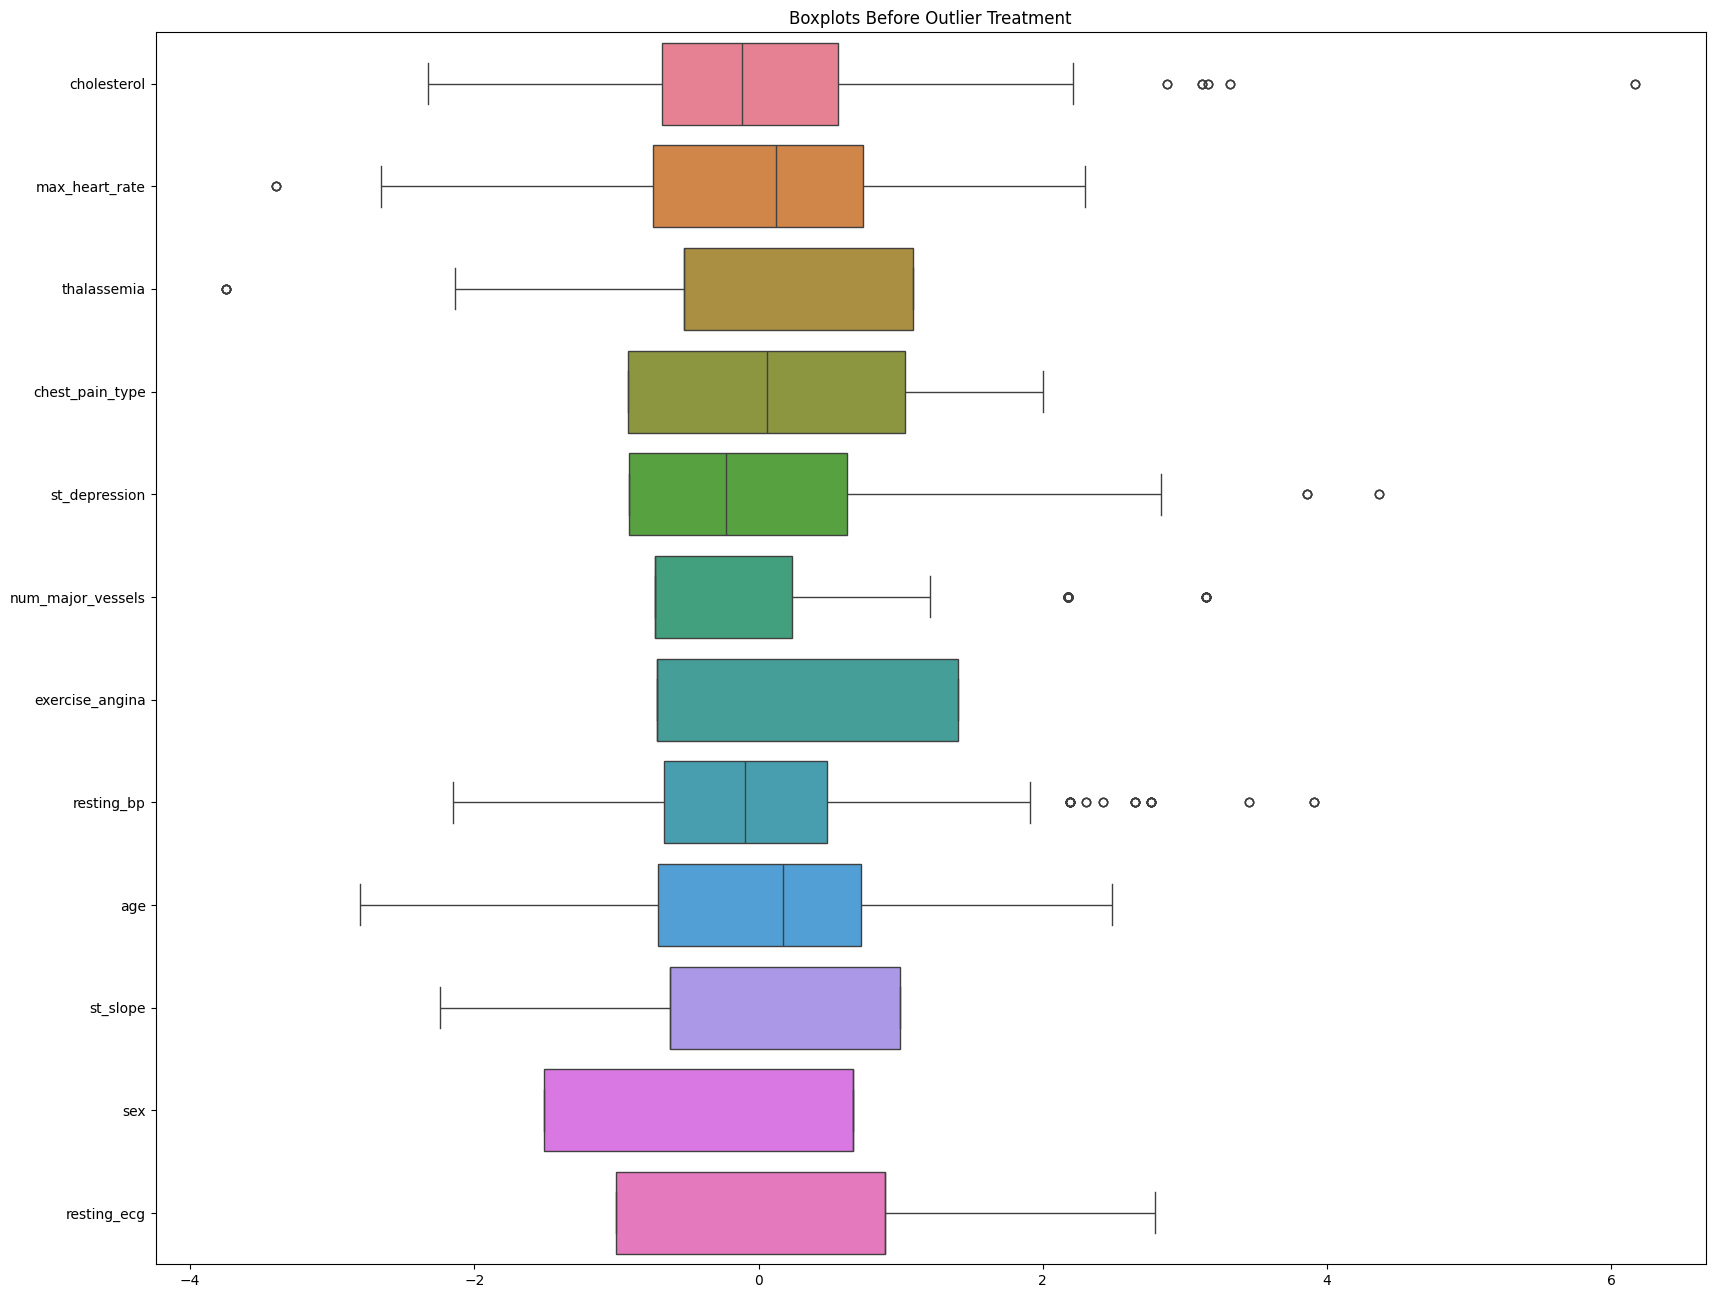

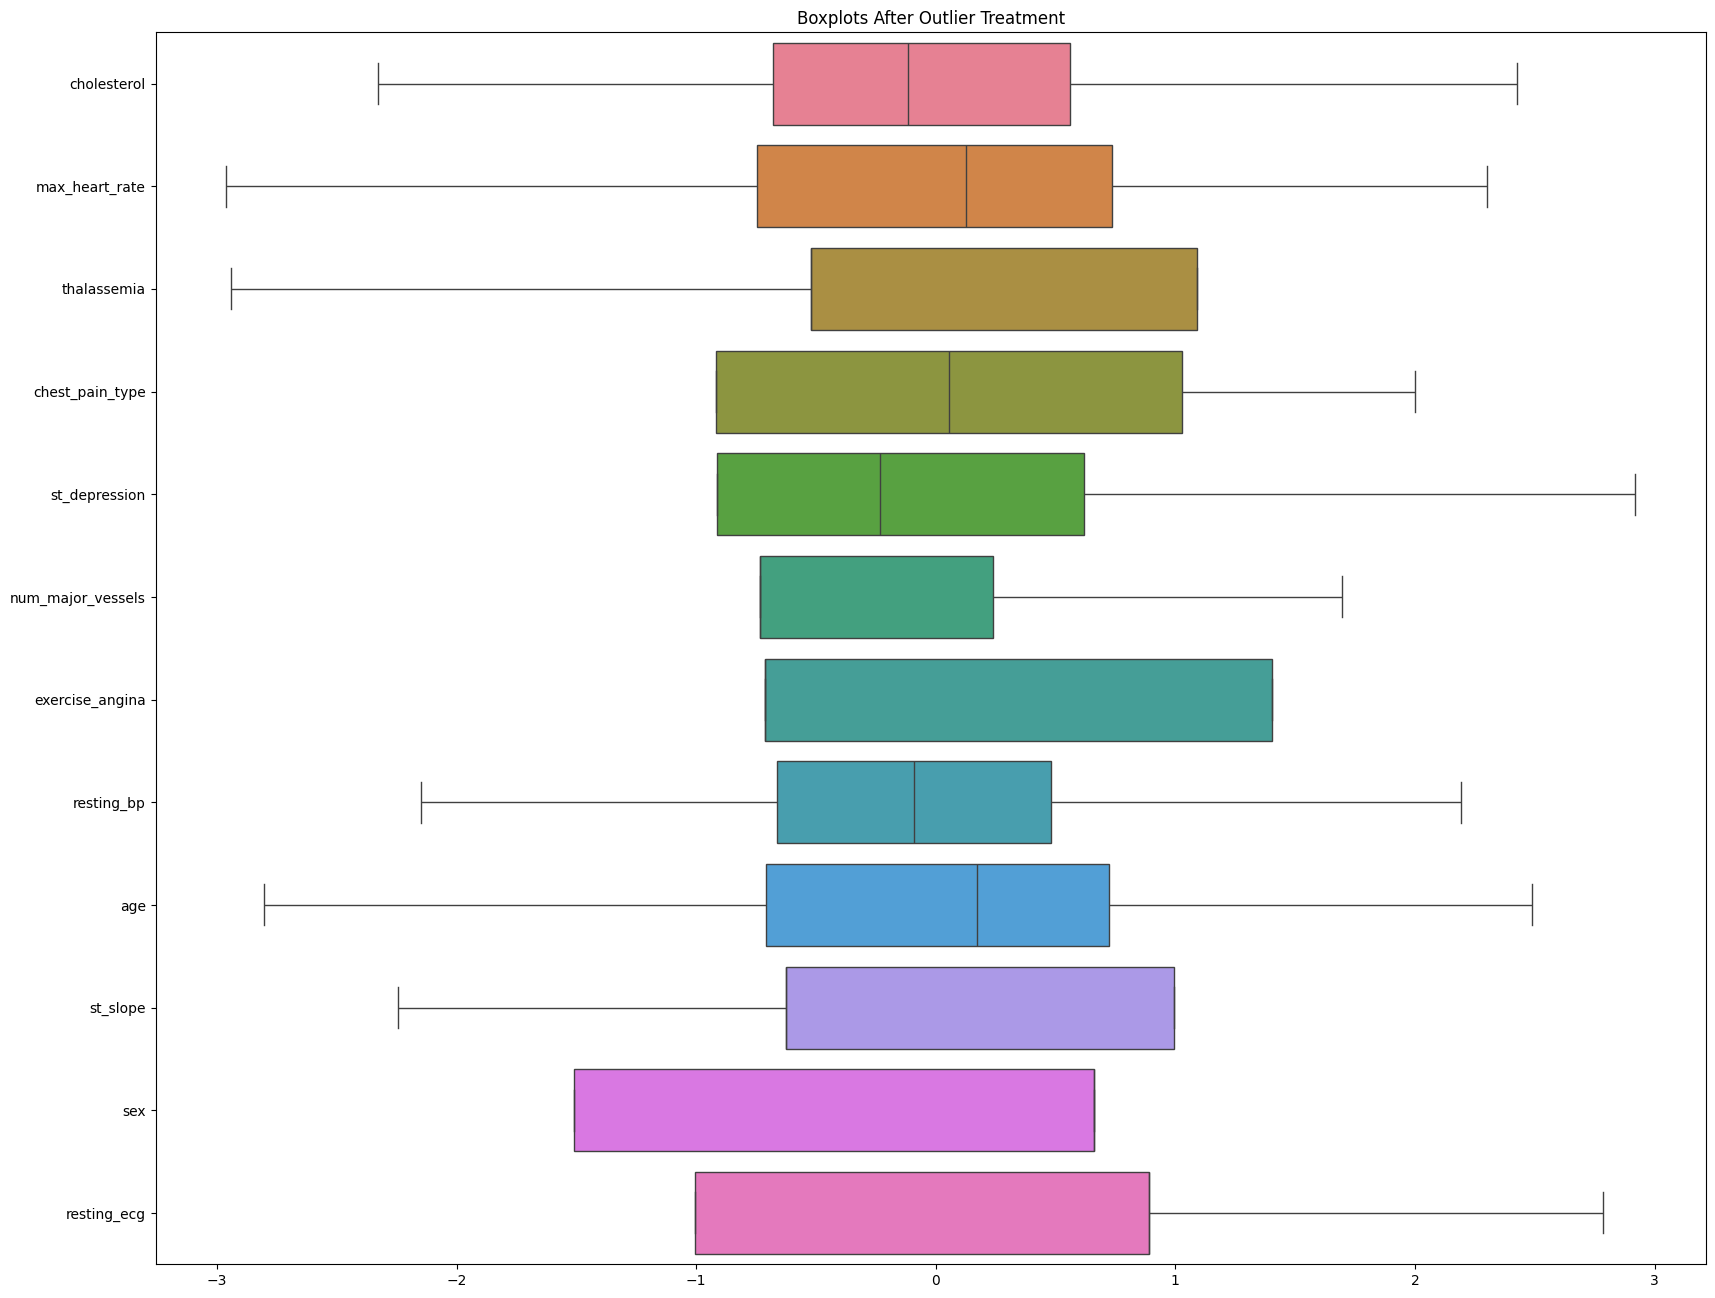

In [2]:
# Outlier Removal

num_cols_all = df.select_dtypes(include=np.number).columns.tolist()
num_cols_all.remove('heart_disease')

# Boxplot before
plt.figure(figsize=(20,16))
sns.boxplot(data=df[num_cols_all], orient='h')
plt.title("Boxplots Before Outlier Treatment")
plt.show()

# IQR capping
Q1 = df[num_cols_all].quantile(0.25)
Q3 = df[num_cols_all].quantile(0.75)
IQR = Q3 - Q1

df_capped = df.copy()
for col in num_cols_all:
    low, high = Q1[col] - 1.5*IQR[col], Q3[col] + 1.5*IQR[col]
    df_capped[col] = df_capped[col].clip(lower=low, upper=high)

# Boxplot after
plt.figure(figsize=(20,16))
sns.boxplot(data=df_capped[num_cols_all], orient='h')
plt.title("Boxplots After Outlier Treatment")
plt.show()


In [3]:
# Define save folder
PROJECT_PATH = "/content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01"
SAVE_FOLDER = os.path.join(PROJECT_PATH, "results/eda_visualizations/outlier_removal")
os.makedirs(SAVE_FOLDER, exist_ok=True)

def save_plot(filename):
    """Save current matplotlib figure to SAVE_FOLDER"""
    plot_path = os.path.join(SAVE_FOLDER, filename)
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"Plot saved: {plot_path}")

# Save boxplot BEFORE outlier treatment
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols_all], orient='h')
plt.title("Boxplots Before Outlier Treatment")
save_plot("boxplot_before_outlier_treatment.png")
plt.close()

# Save boxplot AFTER outlier treatment
plt.figure(figsize=(10,6))
sns.boxplot(data=df_capped[num_cols_all], orient='h')
plt.title("Boxplots After Outlier Treatment")
save_plot("boxplot_after_outlier_treatment.png")
plt.close()

Plot saved: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/results/eda_visualizations/outlier_removal/boxplot_before_outlier_treatment.png
Plot saved: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/results/eda_visualizations/outlier_removal/boxplot_after_outlier_treatment.png


In [4]:
# Updates .csv file save
df_final = df_capped.copy()

print("Final dataset ready for ML:", df_final.shape)

PROC_PATH = os.path.join(PROJECT_PATH, "data/processed/IT24102775_ outlier_removal(4th).csv")
df_final.to_csv(PROC_PATH, index=False)
print("Saved outlier-treated dataset to:", PROC_PATH)

Final dataset ready for ML: (1025, 13)
Saved outlier-treated dataset to: /content/drive/MyDrive/2025-Y2-S1-MLB-B11G1-01/data/processed/IT24102775_ outlier_removal(4th).csv
